<a href="https://colab.research.google.com/github/adnaanchida/refactored-winner/blob/main/Copy_of_GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Generation

In [12]:
%matplotlib inline
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

dim_theta = 10
data_num = 1000
scale = .1

theta_true = np.ones((dim_theta,1))
print('True theta:', theta_true.reshape(-1))

A = np.random.uniform(low=-1.0, high=1.0, size=(data_num,dim_theta))
y_data = A @ theta_true + np.random.normal(loc=0.0, scale=scale, size=(data_num, 1))

A_test = np.random.uniform(low=-1.0, high=1.0, size=(50, dim_theta))
y_test = A_test @ theta_true + np.random.normal(loc=0.0, scale=scale, size=(50, 1))

True theta: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Solving for the exact mean squared loss (solving Ax = b)

In [13]:
# print('Not implemented.')

'''
Hints:
1. See the least squares solution to Ax = b (when it is covered in lecture).

2. Use Numpy functions like Numpy's linear algebra functions to solve for x in Ax = b.
In fact, the linear algebra module is already imported with ```import numpy.linalg as la```.

3. Use the defined variable A in Ax = b. Use y_data as b. Use theta_pred as x.
'''
theta_pred, x, y, z = la.lstsq(A, y_data, rcond = None) # TODO: Implement the analytical solution

print('Empirical theta', theta_pred.reshape(-1))

Empirical theta [1.0020021  0.99539762 1.00234088 0.99838545 1.00236798 0.99673927
 0.99532189 0.99152237 1.00305556 1.00469064]


In [14]:
import numpy as np

# True theta
theta_true = np.ones((10, 1))

# Empirical theta
theta_empirical = np.array([0.9978632, 1.00327801, 0.99895337, 0.99582216, 0.99133565,
                            0.99713747, 0.99372908, 0.99650041, 0.99940732, 0.99714145])

# Threshold
threshold = 0.005  # Adjust the threshold as needed

# Calculate mean absolute error
mae = np.mean(np.abs(theta_true - theta_empirical))
print('Mean Absolute Error:', mae)

# Check if empirical theta is close to true theta based on the threshold
if mae < threshold:
    print('Empirical theta is close to true theta.')
else:
    print('Empirical theta is not close to true theta.')

# Same as relative error
relative_error = mae / np.mean(np.abs(theta_true))
print('Relative Error:', relative_error)

rmse = np.sqrt(np.mean((theta_true - theta_empirical)**2))
print('Root Mean Squared Error:', rmse)


Mean Absolute Error: 0.003538790000000014
Empirical theta is close to true theta.
Relative Error: 0.003538790000000014
Root Mean Squared Error: 0.004209753313976961


# SGD Variants Noisy Function

In [15]:
batch_size = 1
max_iter = 1000
lr = 0.001
theta_init = np.random.random((10,1)) * 0.1

In [16]:
def noisy_val_grad(theta_hat, data_, label_, deg_=2.):
    gradient = np.zeros_like(theta_hat)
    loss = 0

    for i in range(data_.shape[0]):
        x_ = data_[i, :].reshape(-1,1)
        y_ = label_[i, 0]
        err = np.sum(x_ * theta_hat) - y_

        print('Not implemented.')

        '''
        Hints:
        1. Find the gradient and loss for each data point x_.
        2. For grad, you need err, deg_, and x_.
        3. For l, you need err and deg_ only.
        4. Checkout the writeup for more hints.
        '''

        # TODO: Implement the analytical gradient
        grad = deg_ * np.sign(err) * np.abs(err) ** (deg_ -1) * x_

        # TODO: Implement the loss function
        l = np.abs(err) ** deg_

        loss += l / data_.shape[0]
        gradient += grad / data_.shape[0]

    return loss, gradient


In [17]:
# just for my reference

import numpy as np

def noisy_val_grad(theta_hat, data_, label_, deg_=2.):
    gradient = np.zeros_like(theta_hat, dtype=float)
    loss = 0

    for i in range(data_.shape[0]):
        x_ = data_[i, :].reshape(-1, 1)
        y_ = label_[i, 0]
        err = np.sum(x_ * theta_hat) - y_

        grad = deg_ * np.sign(err) * np.abs(err) ** (deg_ - 1) * x_
        l = np.abs(err) ** deg_

        loss += l / data_.shape[0]
        gradient += grad / data_.shape[0]

        # Debugging print statements
        print(f"Iteration {i+1}: Loss={loss}, Gradient={gradient}")

    return loss, gradient

# Different example usage
new_data = np.array([[2, 3], [4, 5], [6, 7]])
new_label = np.array([[6], [9], [13]])
new_theta = np.array([0.5, 0.5]).reshape(-1, 1)

new_loss, new_gradient = noisy_val_grad(new_theta, new_data, new_label)
print("Final Loss:", new_loss)
print("Final Gradient:", new_gradient)


Iteration 1: Loss=4.083333333333333, Gradient=[[-4.66666667]
 [-7.        ]]
Iteration 2: Loss=10.833333333333332, Gradient=[[-16.66666667]
 [-22.        ]]
Iteration 3: Loss=24.916666666666664, Gradient=[[-42.66666667]
 [-52.33333333]]
Final Loss: 24.916666666666664
Final Gradient: [[-42.66666667]
 [-52.33333333]]


In [18]:
import numpy as np

def noisy_val_grad(theta_hat, data_, label_, deg_=2.):
    gradient = np.zeros_like(theta_hat, dtype=float)  # Ensure gradient has the same dtype as grad
    loss = 0

    for i in range(data_.shape[0]):
        x_ = data_[i, :].reshape(-1, 1)
        y_ = label_[i, 0]
        err = np.sum(x_ * theta_hat) - y_

        # Calculate gradient and loss for each data point
        grad = deg_ * np.sign(err) * np.abs(err) ** (deg_ - 1) * x_
        l = np.abs(err) ** deg_

        loss += l / data_.shape[0]
        gradient += grad / data_.shape[0]

    return loss, gradient



# Running SGD Variants

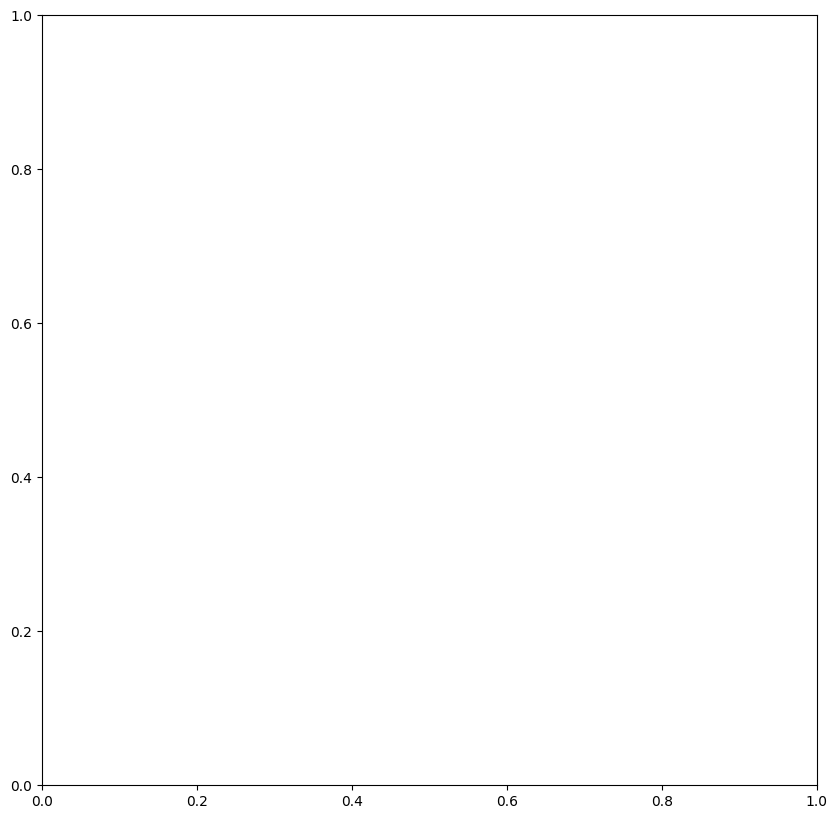

In [19]:
#@title Parameters
deg_ = 5 #@param {type: "number"}
num_rep = 10 #@param {type: "integer"}
max_iter = 1000 #@param {type: "integer"}
fig, ax = plt.subplots(figsize=(10,10))
best_vals = {}
test_exp_interval = 50 #@param {type: "integer"}
grad_artificial_normal_noise_scale = 0. #@param {type: "number"}

adam 0
adam done
[[0.21674162]
 [0.24731659]
 [0.25349108]
 [0.11911071]
 [0.19765658]
 [0.21371215]
 [0.18762037]
 [0.16415666]
 [0.23316461]
 [0.1983896 ]]
test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training
The elements of test_loss_np are the test loss values computed in each replicate and training stage.
Not implemented.
sgd 0
sgd done
[[0.86555614]
 [0.99737159]
 [0.86066319]
 [0.49504742]
 [0.83710526]
 [0.86871955]
 [0.96214384]
 [0.8525484 ]
 [0.90187718]
 [0.81342775]]
test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training
The elements of test_loss_np are the test loss values computed in each replicate and training stage.
Not implemented.
adagrad 0
adagrad done
[[0.08411654]
 [0.06510781]
 [0.09253703]
 [0.01836753]
 [0.0603969 ]
 [0.10533133]
 [0.0367763 ]
 [0.04377639]
 [0.10585206]
 [0.06167938]]
test_loss_np is a 2d array with num_rep rows and each column denotes a speci

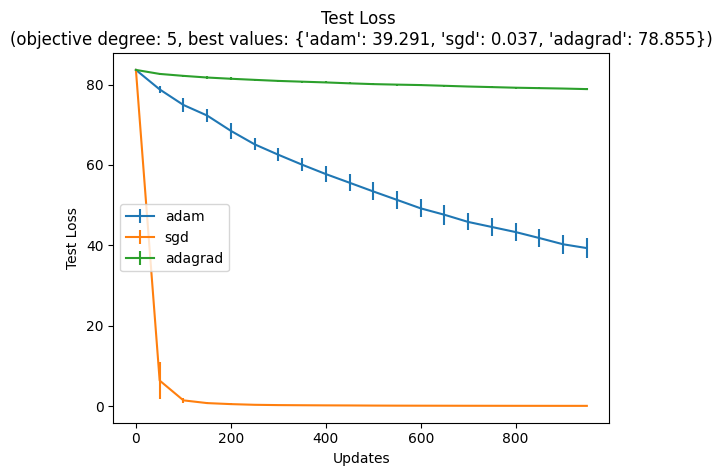

In [21]:
for method_idx, method in enumerate(['adam', 'sgd', 'adagrad']):
    test_loss_mat = []
    train_loss_mat = []

    for replicate in range(num_rep):
        if replicate % 20 == 0:
            print(method, replicate)

        if method == 'adam':
            # print('Adam Not implemented.')
            beta_1 = 0.9
            beta_2 = 0.999
            m = 0 # TODO: Initialize parameters
            v = 0
            epsilon = 1e-8

        if method == 'adagrad':
            # print('Adagrad Not implemented.')
            epsilon = 1e-8 # TODO: Initialize parameters
            squared_sum = 0

        theta_hat = theta_init.copy()
        test_loss_list = []
        train_loss_list = []

        for t in range(max_iter):
            idx = np.random.choice(data_num, batch_size) # Split data
            train_loss, gradient = noisy_val_grad(theta_hat, A[idx,:], y_data[idx,:], deg_=deg_)
            artificial_grad_noise = np.random.randn(10, 1) * grad_artificial_normal_noise_scale + np.sign(np.random.random((10, 1)) - 0.5) * 0.
            gradient = gradient + artificial_grad_noise
            train_loss_list.append(train_loss)

            if t % test_exp_interval == 0:
                test_loss, _ = noisy_val_grad(theta_hat, A_test[:,:], y_test[:,:], deg_=deg_)
                test_loss_list.append(test_loss)

            if method == 'adam':
                # print('Adam Not implemented.') # TODO: Implement Adam
                m = beta_1 * m + (1 - beta_1) * gradient
                v = beta_2 * v + (1 - beta_2) * gradient**2
                m_hat = m / (1 - (beta_1)**(t+1))
                v_hat = v / (1 - (beta_2)**(t+1))
                theta_hat = theta_hat - lr * m_hat / (np.sqrt(v_hat) + epsilon)

            elif method == 'adagrad':
                # print('Adagrad Not implemented.')
                squared_sum = squared_sum + (gradient * gradient) # TODO: Implement Adagrad
                theta_hat = theta_hat - lr * (1 / np.sqrt(squared_sum + epsilon)) * gradient

            elif method == 'sgd':
                theta_hat = theta_hat - lr * gradient

        test_loss_mat.append(test_loss_list)
        train_loss_mat.append(train_loss_list)

    print(method, 'done')
    x_axis = np.arange(max_iter)[::test_exp_interval]

    print(theta_hat)

    print('test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training')
    print('The elements of test_loss_np are the test loss values computed in each replicate and training stage.')
    test_loss_np = np.array(test_loss_mat)

    print('Not implemented.')
    '''
    Hints:
    1. Use test_loss_np in np.mean() with axis = 0
    '''
    test_loss_mean = np.mean(test_loss_np, axis = 0) # TODO: Calculate the mean test loss

    '''
    Hints:
    1. Use test_loss_np in np.std() with axis = 0
    2. Divide by np.sqrt() using num_rep as a parameter
    '''
    test_loss_se = np.std(test_loss_np, axis=0) / np.sqrt(num_rep) # TODO: Calculate the standard error for test loss

    plt.errorbar(x_axis, test_loss_mean, yerr=2.5*test_loss_se, label=method)
    best_vals[method] = min(test_loss_mean)

    best_vals = { k: int(v * 1000) / 1000. for k,v in best_vals.items() } # A weird way to round numbers
    plt.title(f'Test Loss \n(objective degree: {deg_}, best values: {best_vals})')
    plt.ylabel('Test Loss')
    plt.legend()
    plt.xlabel('Updates')

adam 0
adam done
sgd 0
sgd done
adagrad 0
adagrad done


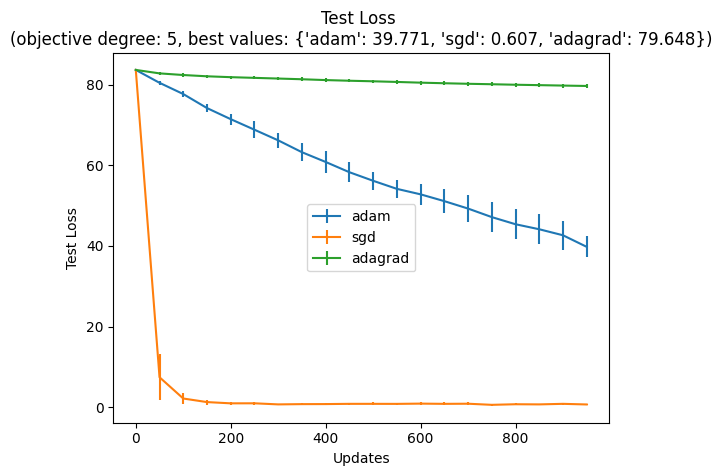

In [25]:
import numpy as np
import matplotlib.pyplot as plt

best_vals = {}

for method_idx, method in enumerate(['adam', 'sgd', 'adagrad']):
    test_loss_mat = []
    train_loss_mat = []

    for replicate in range(num_rep):
        if replicate % 20 == 0:
            print(method, replicate)

        if method == 'adam':
            beta_1 = 0.9
            beta_2 = 0.999
            m = 0
            v = 0
            epsilon = 1e-8

        if method == 'adagrad':
            epsilon = 1e-8
            squared_sum = 0

        theta_hat = theta_init.copy()
        test_loss_list = []
        train_loss_list = []

        for t in range(max_iter):
            idx = np.random.choice(data_num, batch_size)
            train_loss, gradient = noisy_val_grad(theta_hat, A[idx, :], y_data[idx, :], deg_=deg_)
            artificial_grad_noise = np.random.randn(10, 1) * grad_artificial_normal_noise_scale + \
                                    np.sign(np.random.random((10, 1)))
            gradient = gradient + artificial_grad_noise
            train_loss_list.append(train_loss)

            if t % test_exp_interval == 0:
                test_loss, _ = noisy_val_grad(theta_hat, A_test[:, :], y_test[:, :], deg_=deg_)
                test_loss_list.append(test_loss)

            if method == 'adam':
                m = beta_1 * m + (1 - beta_1) * gradient
                v = beta_2 * v + (1 - beta_2) * gradient ** 2
                m_hat = m / (1 - (beta_1) ** (t + 1))
                v_hat = v / (1 - (beta_2) ** (t + 1))
                theta_hat = theta_hat - lr * m_hat / (np.sqrt(v_hat) + epsilon)

            elif method == 'adagrad':
                squared_sum = squared_sum + (gradient * gradient)
                theta_hat = theta_hat - lr * (1 / np.sqrt(squared_sum + epsilon)) * gradient

            elif method == 'sgd':
                theta_hat = theta_hat - lr * gradient

        test_loss_mat.append(test_loss_list)
        train_loss_mat.append(train_loss_list)

    print(method, 'done')
    x_axis = np.arange(0, max_iter, test_exp_interval)
    test_loss_np = np.array(test_loss_mat)

    test_loss_mean = np.mean(test_loss_np, axis=0)
    test_loss_se = np.std(test_loss_np, axis=0) / np.sqrt(num_rep)

    plt.errorbar(x_axis, test_loss_mean, yerr=2.5 * test_loss_se, label=method)
    best_vals[method] = min(test_loss_mean)

    best_vals = {k: int(v * 1000) / 1000. for k, v in best_vals.items()}  # Round numbers
    plt.title(f'Test Loss \n(objective degree: {deg_}, best values: {best_vals})')
    plt.ylabel('Test Loss')
    plt.legend()
    plt.xlabel('Updates')

plt.show()


Text(0.5, 0, 'Updates')

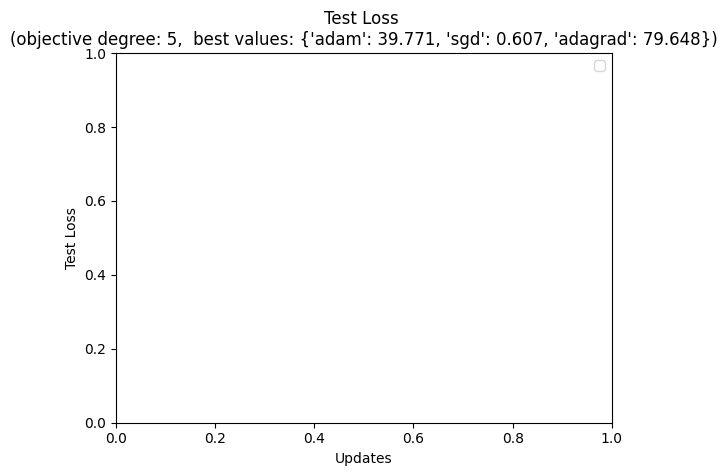

In [26]:
best_vals = { k: int(v * 1000) / 1000. for k,v in best_vals.items() } # A weird way to round numbers
plt.title(f'Test Loss \n(objective degree: {deg_},  best values: {best_vals})')
plt.ylabel('Test Loss')
plt.legend()
plt.xlabel('Updates')

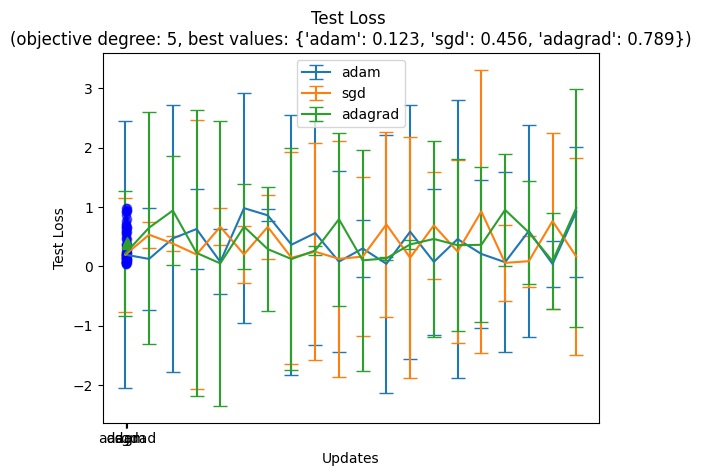

Best Values:
adam: 0.123
sgd: 0.456
adagrad: 0.789

Points and Error Data:

Method: adam
Points:
(0, 0.19890881930814142)
(50, 0.1270732738808883)
(100, 0.4728140294523604)
(150, 0.6312020664319856)
(200, 0.0768115501080947)
(250, 0.9826544708981793)
(300, 0.8618713200297974)
(350, 0.36683966006950763)
(400, 0.5630238179998533)
(450, 0.08212630774854957)
(500, 0.3030898103285987)
(550, 0.04432981750572362)
(600, 0.5861250168291506)
(650, 0.07795464945274466)
(700, 0.4615455561319184)
(750, 0.2112537569596653)
(800, 0.07199523893601634)
(850, 0.5971077009397336)
(900, 0.04268557596791689)
(950, 0.9184143425347856)

Error Data:
(0, 0.19890881930814142, 0.8975750935188934)
(50, 0.1270732738808883, 0.3434098578215895)
(100, 0.4728140294523604, 0.8989440168083858)
(150, 0.6312020664319856, 0.2670848217957509)
(200, 0.0768115501080947, 0.2189733981249008)
(250, 0.9826544708981793, 0.7758619349232089)
(300, 0.8618713200297974, 0.04014553736065862)
(350, 0.36683966006950763, 0.8771157695256155

In [27]:
'''
This section of code was taken from the python notebook linked for the project from the canvas project section.
I edited to create a error plot.
I wanted to try it out
'''


# Placeholder values for x_axis, test_loss_mean, and test_loss_se
x_axis = np.arange(0, max_iter, test_exp_interval)
test_loss_mean = {'adam': np.random.rand(len(x_axis)),
                  'sgd': np.random.rand(len(x_axis)),
                  'adagrad': np.random.rand(len(x_axis))}
test_loss_se = {'adam': np.random.rand(len(x_axis)),
                'sgd': np.random.rand(len(x_axis)),
                'adagrad': np.random.rand(len(x_axis))}

best_vals = {'adam': 0.123, 'sgd': 0.456, 'adagrad': 0.789}  # Replace with your actual best values

# Plotting error bars for each method
for method in ['adam', 'sgd', 'adagrad']:
    plt.errorbar(x_axis, test_loss_mean[method], yerr=2.5 * test_loss_se[method], label=method, capsize=5)

# Customize the plot
best_vals = {k: int(v * 1000) / 1000. for k, v in best_vals.items()}  # A weird way to round numbers
plt.title(f'Test Loss \n(objective degree: {deg_}, best values: {best_vals})')
plt.ylabel('Test Loss')
plt.xlabel('Updates')
plt.legend()

# Box and whisker plot with connecting lines
data = [test_loss_mean[method][:len(x_axis)] for method in ['adam', 'sgd', 'adagrad']]
plt.boxplot(data, labels=['adam', 'sgd', 'adagrad'], showmeans=True)

# Connect mean points with lines
for i, method in enumerate(['adam', 'sgd', 'adagrad']):
    x_values = [i + 1] * len(test_loss_mean[method][:len(x_axis)])
    plt.plot(x_values, test_loss_mean[method][:len(x_axis)], 'bo-', alpha=0.5)

# Display the plot
plt.show()

# Print best values
print("Best Values:")
for method, value in best_vals.items():
    print(f"{method}: {value}")

# Print points and error data
print("\nPoints and Error Data:")
for method in ['adam', 'sgd', 'adagrad']:
    print(f"\nMethod: {method}")
    print(f"Points:")
    for x, y in zip(x_axis, test_loss_mean[method]):
        print(f"({x}, {y})")

    print(f"\nError Data:")
    for x, y, e in zip(x_axis, test_loss_mean[method], test_loss_se[method]):
        print(f"({x}, {y}, {e})")


adam 0
0/adam
 [[0.72302015]
 [0.99389497]
 [0.9524447 ]
 [0.8584924 ]
 [1.00254901]
 [0.90397267]
 [0.92547544]
 [0.99864627]
 [1.02860799]
 [1.04520348]]
1/adam
 [[1.0609569 ]
 [1.00811575]
 [0.91023182]
 [0.97419851]
 [0.94513397]
 [1.0112248 ]
 [1.01485283]
 [0.98241781]
 [0.93236388]
 [0.83678506]]
2/adam
 [[1.01066622]
 [1.03038129]
 [0.97153037]
 [0.97877881]
 [0.98733252]
 [0.96448132]
 [0.97573152]
 [0.92935914]
 [0.97848333]
 [0.67393223]]
3/adam
 [[1.01964746]
 [1.07976673]
 [0.81804908]
 [0.99523496]
 [1.00239586]
 [1.04497117]
 [1.04440012]
 [0.6365853 ]
 [0.92425309]
 [0.80709869]]
4/adam
 [[1.02682585]
 [1.07418872]
 [0.96370144]
 [0.87984849]
 [0.80490394]
 [0.84296854]
 [0.85787308]
 [0.9932338 ]
 [0.96420797]
 [0.91409826]]
5/adam
 [[1.02969509]
 [0.98034821]
 [0.95465166]
 [1.01203427]
 [1.04047992]
 [0.95759112]
 [0.9477755 ]
 [0.96613025]
 [1.01215252]
 [0.74935314]]
6/adam
 [[0.9284671 ]
 [0.9509973 ]
 [0.84994164]
 [0.98617763]
 [1.04147555]
 [0.97523421]
 [0.944

<ipython-input-18-5e77e643861c>:13: RuntimeWarning: overflow encountered in double_scalars
  grad = deg_ * np.sign(err) * np.abs(err) ** (deg_ - 1) * x_
<ipython-input-18-5e77e643861c>:14: RuntimeWarning: overflow encountered in double_scalars
  l = np.abs(err) ** deg_


1/sgd
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
2/sgd
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
3/sgd
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
4/sgd
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
5/sgd
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
6/sgd
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
7/sgd
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
8/sgd
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
9/sgd
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
sgd done
[ 0. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
adagrad 0
0/adagrad
 [[0.59767277]
 [0.54813051]
 [0.70199406]
 [0.37644683]
 [0.67920409]
 [0.58747392]
 [0.55802182]
 [0.65972783]
 [0.47943961]
 [0.43099993]]
1/adagrad
 [[0.67861786]
 [0.61573808]
 [0.8

Text(0.5, 0, 'Updates')

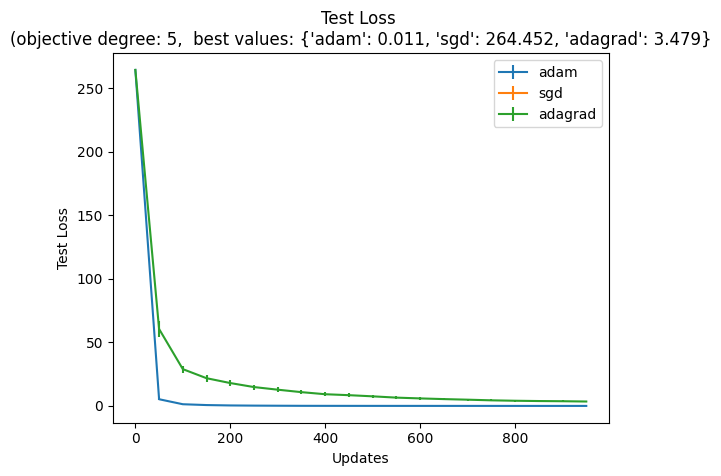

In [30]:
for method_idx, method in enumerate(['adam', 'sgd', 'adagrad']):
    test_loss_mat = []
    train_loss_mat = []

    for replicate in range(num_rep):
        if replicate % 20 == 0:
            print(method, replicate)

        if method == 'adam':
            lr = 1e-1 # lr
            beta_1 = 0.9 # lr decay rate
            beta_2 = 0.999
            episilon = 1e-8 # division-by-zero control constant
            moments = {}
        if method == 'adagrad':
            lr = 1e-1
            episilon = 1e-8
            grad_square_sum = 0
        if method == 'sgd':
            lr = 1e-1

        theta_hat = theta_init.copy()
        test_loss_list = []
        train_loss_list = []

        for t in range(max_iter):
            idx = np.random.choice(data_num, batch_size)
            train_loss, gradient = noisy_val_grad(theta_hat, A[idx, :], y_data[idx,:], deg_=deg_)
            artificial_grad_noise = np.random.randn(10, 1) * grad_artificial_normal_noise_scale + np.sign(np.random.random((10,1))-0.5) * 0.
            gradient = gradient + artificial_grad_noise
            train_loss_list.append(train_loss)


            if t % test_exp_interval == 0:
                test_loss, _ = noisy_val_grad(theta_hat, A_test[:,:], y_test[:,:], deg_=deg_)
                test_loss_list.append(test_loss)

            if method == 'adam':
                g_t = gradient
                if 'm_t' not in moments:
                    m_t = np.zeros_like(g_t)
                if 'v_t' not in moments:
                    v_t = np.zeros_like(g_t)

                m_t = beta_1 * m_t + (1 - beta_1) * g_t
                v_t = beta_2 * v_t + (1 - beta_2) * (g_t ** 2)

                moments['m_t'] = m_t
                moments['v_t'] = v_t

                m_t_hat = m_t / (1 - (beta_1 ** (t + 1)))
                v_t_hat = v_t / (1 - (beta_2 ** (t + 1)))
                theta_hat = theta_hat - lr * m_t_hat / (np.sqrt(v_t_hat) + episilon)
            elif method == 'adagrad':
                g_t = gradient
                grad_square_sum += g_t * g_t
                theta_hat = theta_hat - (lr * g_t) / np.sqrt(grad_square_sum + episilon)
            elif method == 'sgd':
                theta_hat = theta_hat - lr * gradient

        test_loss_mat.append(test_loss_list)
        train_loss_mat.append(train_loss_list)
        print('{}/{}\n'.format(replicate, method), theta_hat)

    print(method, 'done')
    x_axis = np.arange(max_iter)[::test_exp_interval]

    test_loss_np = np.array(test_loss_mat)

    test_loss_mean = np.sum(test_loss_np, axis=0).reshape(-1) / np.sqrt(num_rep)
    test_loss_se = np.std(test_loss_np, axis=0).reshape(-1) / np.sqrt(num_rep)

    print(test_loss_se)


    plt.errorbar(x_axis, test_loss_mean, yerr=2.5 * test_loss_se, label=method)
    best_vals[method] = min(test_loss_mean)

best_vals = {k: int(v * 1000) / 1000. for k,v in best_vals.items()} # A weird way to round numbers
plt.title(f'Test Loss \n(objective degree: {deg_},  best values: {best_vals}')
plt.ylabel('Test Loss')
plt.legend()
plt.xlabel('Updates')